Movie Genre Data Analysis
Here's what I'll be looking at:

Most Common Genres: Which genres have the most movies made?
High Budget and Revenue: Which genres have the highest average budget and revenue?
High Profit: Which genres show the highest average profit?
High Popularity: Which genres have the highest average popularity?
Top Rated Movies: Which genres have the most movies with an average rating of 8 or higher?

In [1]:
#Imports the pandas library
#Purpose: Helps to manage and analyze data
import pandas as pd

In [2]:
#Connected Google Drive and loaded a CSV file.
#Purpose: To use files from Google Drive in your Colab notebook
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
root = "/content/gdrive/MyDrive"
#root is the folder path in Google Drive where my files are save
movies = pd.read_csv(f'{root}/Colab Notebooks/Pandas_Data/imdb_movies.csv')

Mounted at /content/gdrive


In [3]:
#Shows the first few rows of the movies DataFrame to quickly preview the data

In [4]:
#Purpose: Provides a summary of the DataFrame, including the number of entries, column names, and data types
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [5]:
#Sets options to display more rows and columns, then shows the first few rows of the movies DataFrame
#Purpose: To view a larger portion of the DataFrame and check its content more thoroughly
pd.set_option('display.max.rows', 11000)
pd.set_option('display.max.columns', 23)
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [6]:
#Purpose: To identify and count duplicate rows in the DataFrame
movies[movies.duplicated()].sum()
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [7]:
#Purpose: To view which rows are duplicated in the DataFrame
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
2090,42194,tt0411951,0.59643,30000000,967000,TEKKEN,Jon Foo|Kelly Overton|Cary-Hiroyuki Tagawa|Ian...,NaN,Dwight H. Little,Survival is no game,martial arts|dystopia|based on video game|mart...,"In the year of 2039, after World Wars destroy ...",92,Crime|Drama|Action|Thriller|Science Fiction,Namco|Light Song Films,3/20/10,110,5.0,2010,30000000.0,967000.0


In [8]:
#Purpose: To clean the DataFrame by eliminating duplicate entries
movies.drop_duplicates(inplace=True)

In [9]:
#Purpose: To confirm that there are no more duplicate rows remaining
movies[movies.duplicated()]

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj


In [10]:
#Purpose: To clean the DataFrame by getting rid of rows where the genres column is empty,directly updating the DataFrame (inplace=True)
movies.dropna(subset = ['genres'], inplace = True)
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [11]:
#Purpose: To see how the DataFrame has changed after cleaning up
movies.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10842 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10842 non-null  int64  
 1   imdb_id               10834 non-null  object 
 2   popularity            10842 non-null  float64
 3   budget                10842 non-null  int64  
 4   revenue               10842 non-null  int64  
 5   original_title        10842 non-null  object 
 6   cast                  10767 non-null  object 
 7   homepage              2931 non-null   object 
 8   director              10800 non-null  object 
 9   tagline               8036 non-null   object 
 10  keywords              9367 non-null   object 
 11  overview              10839 non-null  object 
 12  runtime               10842 non-null  int64  
 13  genres                10842 non-null  object 
 14  production_companies  9826 non-null   object 
 15  release_date          10

In [12]:
#Purpose: To create and view the profit for each movie
movies['profit'] = movies['revenue'] - movies['budget']
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [13]:
#Purpose: To view the chosen columns and check their contents
movies[['popularity', 'budget', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count','vote_average', 'profit', ]]
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [14]:
#Purpose:Creates a new DataFrame movies_genre with selected columns from the movies
movies_genre = movies[['popularity', 'budget', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count','vote_average', 'profit', 'revenue' ]]
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09,1363528810
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08,228436354
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08,185238201
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09,1868178225
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09,1316249360


In [15]:
#Imports Series and DataFrame from pandas and splits the genres column into separate rows for each genre
#Purpose: To use Series for processing individual columns and transform the genres column so each genre gets its own row for easier analysis
from pandas import Series, DataFrame
movies_genre['genres'].str.split('|').apply(Series,1).stack()

<ipython-input-15-c04df387a087>:4: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series,1).stack()


0      0             Action
       1          Adventure
       2    Science Fiction
       3           Thriller
1      0             Action
                 ...       
10863  0            Mystery
       1             Comedy
10864  0             Action
       1             Comedy
10865  0             Horror
Length: 26955, dtype: object

In [61]:
#To break down the genres column into multiple columns, with each column representing a different genre
from pandas import Series, DataFrame
movies_genre['genres'].str.split('|').apply(Series,1).head()

<ipython-input-61-eb4ba4a79da8>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  movies_genre['genres'].str.split('|').apply(Series,1).head()


,0,1,2,3,4
0,Action,Adventure,Science Fiction,Thriller,NaN
1,Action,Adventure,Science Fiction,Thriller,NaN
2,Adventure,Science Fiction,Thriller,NaN,NaN
3,Action,Adventure,Science Fiction,Fantasy,NaN
4,Action,Crime,Thriller,NaN,NaN


In [62]:
#Purpose: To create a series where each genre is in its own row and can be easily analyzed or merged with other data
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genre_split'
split.head()

<ipython-input-62-efd3b8cc57e9>:2: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


,genre_split
0,Action
0,Adventure
0,Science Fiction
0,Thriller
1,Action


In [63]:
#Breaks the genres column into separate rows, removes the old genres column, and adds the new genre_split column
#Purpose: To make each genre its own row and update the DataFrame with this new structure
split = movies_genre['genres'].str.split('|').apply(Series,1).stack()
split.index = split.index.droplevel(-1)
split.name = 'genre_split'
del movies_genre['genres']
movies_genre = movies_genre.join(split)
movies_genre.head()

<ipython-input-63-12cdfeed5155>:3: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre['genres'].str.split('|').apply(Series,1).stack()


,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,profit,revenue,genre_split
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Action
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Adventure
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Science Fiction
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Thriller
1,28.42,150000000,Mad Max: Fury Road,120,5/13/15,6185,7.10,228436354,378436354,Action


Most Common Genres: Which genres have the most movies made? High Budget and Revenue: Which genres have the highest average budget

In [19]:
#Counts the number of movies for each genre in the genre_split column.To find out how many movies belong to each genre
movies_genre.groupby('genre_split').count()

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,profit,revenue
genre_split,,,,,,,,,
Action,2384,2384,2384,2384,2384,2384,2384,2384,2384
Adventure,1471,1471,1471,1471,1471,1471,1471,1471,1471
Animation,699,699,699,699,699,699,699,699,699
Comedy,3793,3793,3793,3793,3793,3793,3793,3793,3793
Crime,1354,1354,1354,1354,1354,1354,1354,1354,1354
Documentary,520,520,520,520,520,520,520,520,520
Drama,4760,4760,4760,4760,4760,4760,4760,4760,4760
Family,1231,1231,1231,1231,1231,1231,1231,1231,1231
Fantasy,916,916,916,916,916,916,916,916,916


In [20]:
# Counts the number of movies per genre and sorts the counts in descending order
#Purpose: To see which genres have the most movies
movies_genre.groupby('genre_split')['original_title'].count().sort_values(ascending = False)

,original_title
genre_split,
Drama,4760
Comedy,3793
Thriller,2907
Action,2384
Romance,1712
Horror,1637
Adventure,1471
Crime,1354
Family,1231


In [21]:
#Creates a DataFrame showing the number of unique movies per genre, then sorts the genres by the number of movies in descending order.
#Purpose: To identify which genres have the most unique movies.
pd.DataFrame(movies_genre.groupby('genre_split').original_title.nunique()).sort_values('original_title', ascending = False)

,original_title
genre_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


In [22]:
#Creates a DataFrame genres_count that shows the number of unique movies for each genre and sorts the genres by this count in descending orde
#Purpose: To see which genres have the highest number of unique movies
genres_count = pd.DataFrame(movies_genre.groupby('genre_split').original_title.nunique()).sort_values('original_title', ascending = False)
genres_count

,original_title
genre_split,
Drama,4672
Comedy,3750
Thriller,2841
Action,2339
Romance,1686
Horror,1580
Adventure,1442
Crime,1337
Family,1211


<Axes: title={'center': 'Movies Per Genre in %'}, ylabel='original_title'>

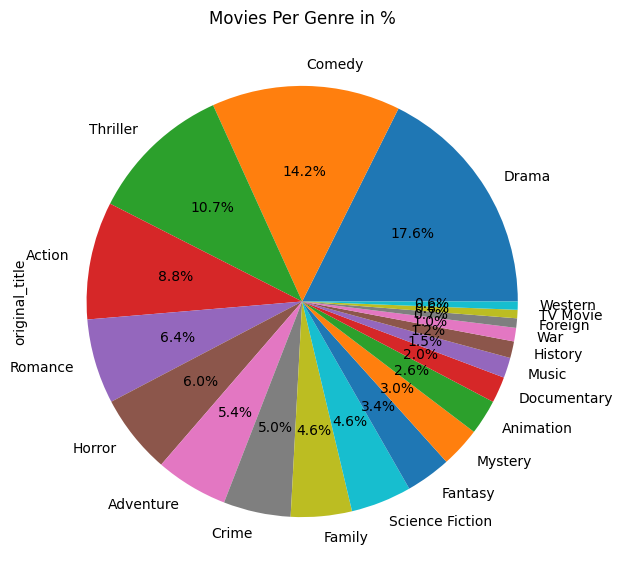

In [23]:
#Purpose: Creates a pie chart that shows the percentage of movies for each genre.
genres_count['original_title'].plot.pie(title='Movies Per Genre in %', autopct='%1.1f%%', figsize = (7,7))

In [24]:
#Purpose:Creates a DataFrame genres_count that shows the number of unique movies for each genre and sorts the genres by this count in ascending order.
#To identify which genres have the fewest unique movies.
genres_count = pd.DataFrame(movies_genre.groupby('genre_split').original_title.nunique()).sort_values('original_title', ascending = True)
genres_count

,original_title
genre_split,
Western,163
TV Movie,167
Foreign,188
War,269
History,331
Music,403
Documentary,520
Animation,697
Mystery,796


<Axes: title={'center': 'Movies per Genre'}, ylabel='genre_split'>

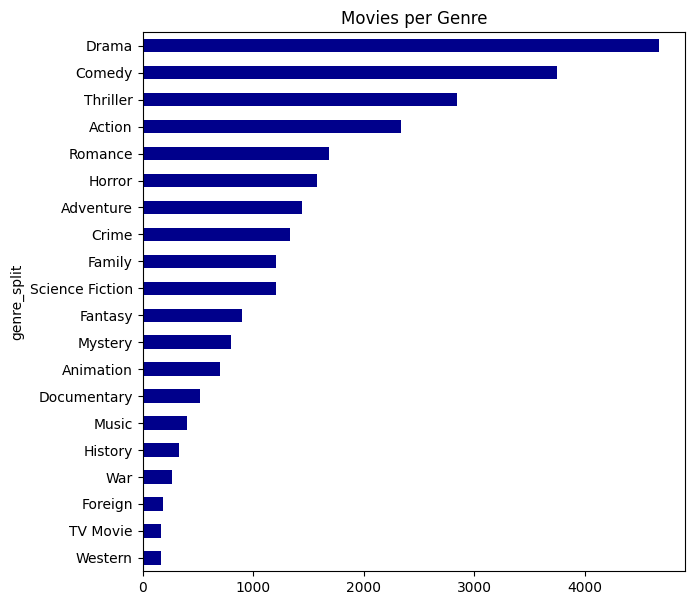

In [25]:
#Purpose: to visually compare the number of unique movies across different genres.
genres_count['original_title'].plot.barh(title='Movies per Genre', color='DarkBlue', figsize=(7, 7))

High avg. budget and revenue?

In [26]:
#Groups movies by genre and calculates the average values for each genre
#Purpose: To see the average of numeric data, like ratings or budgets, for each genre
genres_avg = movies_genre.groupby('genre_split').mean(numeric_only=True)
pd.options.display.float_format = '{:.2f}'.format
genres_avg


,popularity,budget,runtime,vote_count,vote_average,profit,revenue
genre_split,,,,,,,
Action,0.93,27727820.33,104.92,392.99,5.79,45066911.67,72794732.00
Adventure,1.15,37543694.53,106.17,513.13,5.94,75594166.54,113137861.07
Animation,0.85,23159781.61,68.18,303.00,6.40,52096280.62,75256062.22
Comedy,0.59,13297915.62,96.75,176.44,5.91,24228326.45,37526242.07
Crime,0.74,17663801.12,106.92,278.81,6.12,24704860.52,42368661.65
Documentary,0.18,577149.15,102.65,35.11,6.91,1463957.85,2041106.99
Drama,0.59,11880717.77,110.48,182.54,6.17,17351537.95,29232255.73
Family,0.79,23359337.42,89.60,272.32,6.00,49073838.95,72433176.37
Fantasy,0.99,32612585.35,100.74,420.74,5.86,63701071.73,96313657.08


In [27]:
#Sorts the genres_avg DataFrame by the average budget in ascending order
#Purpose: To see which genres have the lowest average budget
genres_avg.sort_values('budget', ascending = True, inplace = True)
genres_avg

,popularity,budget,runtime,vote_count,vote_average,profit,revenue
genre_split,,,,,,,
TV Movie,0.27,267664.67,91.98,34.37,5.79,-16167.66,251497.01
Documentary,0.18,577149.15,102.65,35.11,6.91,1463957.85,2041106.99
Foreign,0.19,1451434.93,107.23,16.63,5.98,69024.91,1520459.84
Horror,0.47,6226529.21,94.42,120.06,5.34,10596279.41,16822808.62
Music,0.49,9438627.55,105.14,124.34,6.48,19133141.14,28571768.69
Drama,0.59,11880717.77,110.48,182.54,6.17,17351537.95,29232255.73
Romance,0.59,12531271.85,106.89,166.07,6.04,23160700.48,35691972.33
Comedy,0.59,13297915.62,96.75,176.44,5.91,24228326.45,37526242.07
Mystery,0.69,16119270.06,105.93,237.00,5.95,24098296.60,40217566.66


Index(['popularity', 'budget', 'runtime', 'vote_count', 'vote_average',
       'profit', 'revenue'],
      dtype='object')

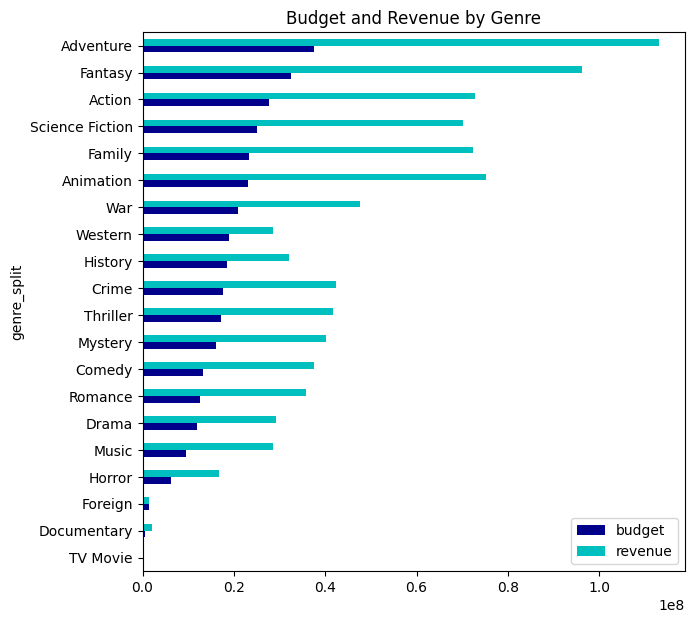

In [28]:
#Purpose: To visually compare the average budget and revenue across different genres
genres_avg[['budget', 'revenue']].plot.barh(title ='Budget and Revenue by Genre', color=['DarkBlue', 'c'], figsize=(7, 7))
genres_avg.columns

High Profit: Which genres show the highest average profit?

In [29]:
genres_avg.head()

,popularity,budget,runtime,vote_count,vote_average,profit,revenue
genre_split,,,,,,,
TV Movie,0.27,267664.67,91.98,34.37,5.79,-16167.66,251497.01
Documentary,0.18,577149.15,102.65,35.11,6.91,1463957.85,2041106.99
Foreign,0.19,1451434.93,107.23,16.63,5.98,69024.91,1520459.84
Horror,0.47,6226529.21,94.42,120.06,5.34,10596279.41,16822808.62
Music,0.49,9438627.55,105.14,124.34,6.48,19133141.14,28571768.69


In [30]:
#Sorts the genres_avg DataFrame by average profit in ascending order.
#Purpose: To see which genres have the lowest average profit.
genres_avg.sort_values('profit', ascending = True, inplace = True)
genres_avg

,popularity,budget,runtime,vote_count,vote_average,profit,revenue
genre_split,,,,,,,
TV Movie,0.27,267664.67,91.98,34.37,5.79,-16167.66,251497.01
Foreign,0.19,1451434.93,107.23,16.63,5.98,69024.91,1520459.84
Documentary,0.18,577149.15,102.65,35.11,6.91,1463957.85,2041106.99
Western,0.59,18974107.98,117.58,205.74,6.08,9594601.31,28568709.28
Horror,0.47,6226529.21,94.42,120.06,5.34,10596279.41,16822808.62
History,0.58,18594919.30,136.21,183.77,6.41,13416873.91,32011793.22
Drama,0.59,11880717.77,110.48,182.54,6.17,17351537.95,29232255.73
Music,0.49,9438627.55,105.14,124.34,6.48,19133141.14,28571768.69
Romance,0.59,12531271.85,106.89,166.07,6.04,23160700.48,35691972.33


Index(['popularity', 'budget', 'runtime', 'vote_count', 'vote_average',
       'profit', 'revenue'],
      dtype='object')

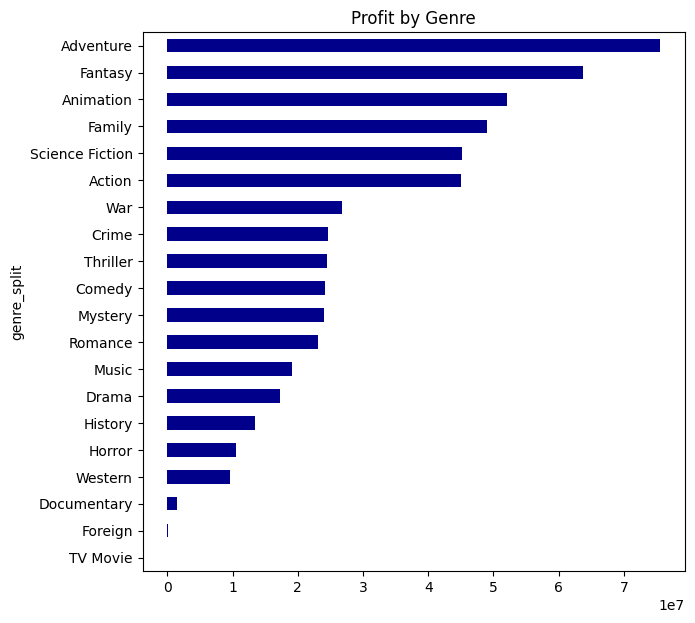

In [31]:
#Purpose: To visually compare the average profit across different genres
genres_avg['profit'].plot.barh(title ='Profit by Genre', color='DarkBlue', figsize=(7, 7))
genres_avg.columns

High Popularity: Which genres have the highest average popularity?



In [32]:
#Sorts the genres_avg DataFrame by average popularity in ascending order
#Purpose: To see which genres have the lowest average popularity
genres_avg.sort_values('popularity', ascending = True, inplace = True)
genres_avg

,popularity,budget,runtime,vote_count,vote_average,profit,revenue
genre_split,,,,,,,
Documentary,0.18,577149.15,102.65,35.11,6.91,1463957.85,2041106.99
Foreign,0.19,1451434.93,107.23,16.63,5.98,69024.91,1520459.84
TV Movie,0.27,267664.67,91.98,34.37,5.79,-16167.66,251497.01
Horror,0.47,6226529.21,94.42,120.06,5.34,10596279.41,16822808.62
Music,0.49,9438627.55,105.14,124.34,6.48,19133141.14,28571768.69
History,0.58,18594919.30,136.21,183.77,6.41,13416873.91,32011793.22
Western,0.59,18974107.98,117.58,205.74,6.08,9594601.31,28568709.28
Drama,0.59,11880717.77,110.48,182.54,6.17,17351537.95,29232255.73
Romance,0.59,12531271.85,106.89,166.07,6.04,23160700.48,35691972.33


Index(['popularity', 'budget', 'runtime', 'vote_count', 'vote_average',
       'profit', 'revenue'],
      dtype='object')

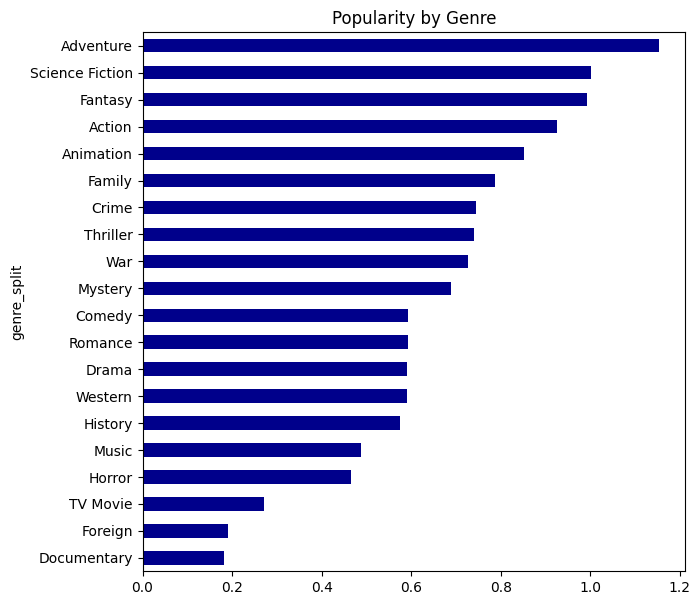

In [33]:
#Purpose: To visually compare the average popularity across different genres
genres_avg['popularity'].plot.barh(title ='Popularity by Genre', color='DarkBlue', figsize=(7, 7))
genres_avg.columns

Top Rated Movies: Which genres have the most movies with an average rating of 8 or higher?

In [34]:
movies_genre.head()

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,profit,revenue,genre_split
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Action
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Adventure
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Science Fiction
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Thriller
1,28.42,150000000,Mad Max: Fury Road,120,5/13/15,6185,7.10,228436354,378436354,Action


In [35]:
vote_fifty = movies_genre[(movies_genre['vote_count'] >= 50) & (movies_genre['vote_average'] >= 8)].head()
#Purpose: To get a list of movies with both a high number of votes and a high average rating
vote_zero = movies_genre[movies_genre['vote_count'] >= 8]
#Purpose: To get a list of movies with a high number of votes, regardless of their average rating.

In [36]:
vote_fifty.head()

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,profit,revenue,genre_split
9,6.33,175000000,Inside Out,94,6/9/15,3935,8.00,678708609,853708609,Comedy
9,6.33,175000000,Inside Out,94,6/9/15,3935,8.00,678708609,853708609,Animation
9,6.33,175000000,Inside Out,94,6/9/15,3935,8.00,678708609,853708609,Family
35,3.56,6000000,Room,117,10/16/15,1520,8.00,29401758,35401758,Drama
35,3.56,6000000,Room,117,10/16/15,1520,8.00,29401758,35401758,Thriller


In [37]:
vote_zero.head()

,popularity,budget,original_title,runtime,release_date,vote_count,vote_average,profit,revenue,genre_split
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Action
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Adventure
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Science Fiction
0,32.99,150000000,Jurassic World,124,6/9/15,5562,6.50,1363528810,1513528810,Thriller
1,28.42,150000000,Mad Max: Fury Road,120,5/13/15,6185,7.10,228436354,378436354,Action


In [73]:
#To find and display the average vote rating for each genre, sorted from lowest to highest, based on movies with at least 50 votes and an average rating of 8 or higher
genres_vote = vote_fifty.groupby('genre_split')['vote_average'].mean().sort_values(ascending=True).reset_index()
genres_count
genres_vote

,genre_split,vote_average
0,Animation,8.00
1,Comedy,8.00
2,Drama,8.00
3,Family,8.00
4,Thriller,8.00


<Axes: title={'center': 'Vote Average by Genre'}, ylabel='genre_split'>

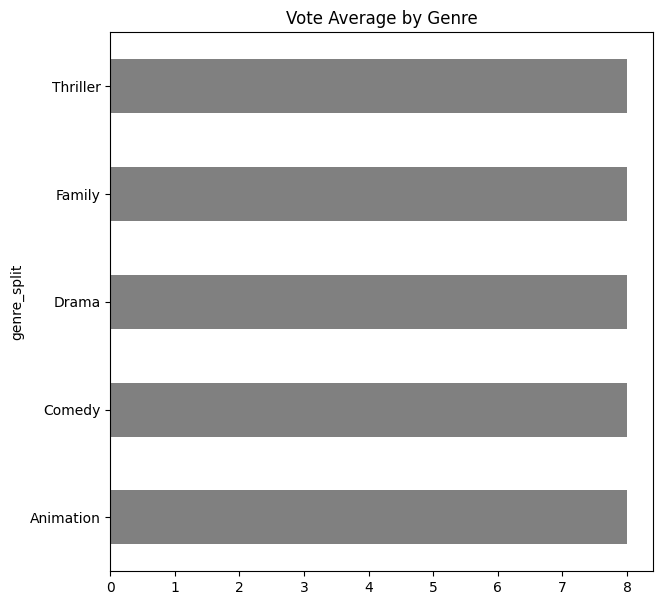

In [74]:
#Purpose: To visually compare the average vote ratings across different genres
genres_vote.set_index('genre_split', inplace=True)
genres_vote['vote_average'].plot.barh(title ='Vote Average by Genre', color='Grey', figsize=(7, 7))

In [40]:
#Purpose: To re-access and work with the movie data stored in Google Drive for answering additional questions.
import pandas as pd
from google.colab import drive

drive.mount("/content/gdrive", force_remount=True)
root = "/content/gdrive/MyDrive"

movies = pd.read_csv(f'{root}/Colab Notebooks/Pandas_Data/imdb_movies.csv')

Mounted at /content/gdrive


In [41]:
#Cleans the data by removing duplicates, calculates profit, and selects specific columns
#Purpose: To prepare the data for analyzing which movies have high profit and revenue based on vote average
movies.drop_duplicates(inplace = True)
movies['profit'] = movies['revenue'] - movies['budget']
movies_genre = movies[['popularity', 'budget', 'original_title', 'runtime', 'genres', 'release_date', 'vote_count','vote_average', 'profit', 'revenue' ]]
movies_genre.head()

,popularity,budget,original_title,runtime,genres,release_date,vote_count,vote_average,profit,revenue
0,32.99,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50,1363528810,1513528810
1,28.42,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10,228436354,378436354
2,13.11,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30,185238201,295238201
3,11.17,200000000,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50,1868178225,2068178225
4,9.34,190000000,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30,1316249360,1506249360


The best movies according to vote avg return high profit and revenue The best movies according to popularity return high profit and revenue

In [42]:
#Filters the movies_genre DataFrame to include only movies with at least 50 votes
#Purpose: To focus on movies with a significant number of votes for further analysis
movies_counted = movies_genre[movies_genre['vote_count'] >= 50]
movies_counted.head()

,popularity,budget,original_title,runtime,genres,release_date,vote_count,vote_average,profit,revenue
0,32.99,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50,1363528810,1513528810
1,28.42,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10,228436354,378436354
2,13.11,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30,185238201,295238201
3,11.17,200000000,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50,1868178225,2068178225
4,9.34,190000000,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30,1316249360,1506249360


In [43]:
#Purpose: To find and show how numeric features in the movies_counted DataFrame are related to each other
# Select only numeric columns from the DataFrame
numeric_cols = movies_counted.select_dtypes(include='number')

# Calculate the Spearman correlation for the numeric columns
correlation_matrix = numeric_cols.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

              popularity  budget  runtime  vote_count  vote_average  profit  \
popularity          1.00    0.49     0.23        0.77          0.19    0.50   
budget              0.49    1.00     0.36        0.55         -0.04    0.33   
runtime             0.23    0.36     1.00        0.26          0.29    0.21   
vote_count          0.77    0.55     0.26        1.00          0.28    0.58   
vote_average        0.19   -0.04     0.29        0.28          1.00    0.20   
profit              0.50    0.33     0.21        0.58          0.20    1.00   
revenue             0.59    0.71     0.34        0.68          0.11    0.84   

              revenue  
popularity       0.59  
budget           0.71  
runtime          0.34  
vote_count       0.68  
vote_average     0.11  
profit           0.84  
revenue          1.00  


<Axes: xlabel='vote_average', ylabel='profit'>

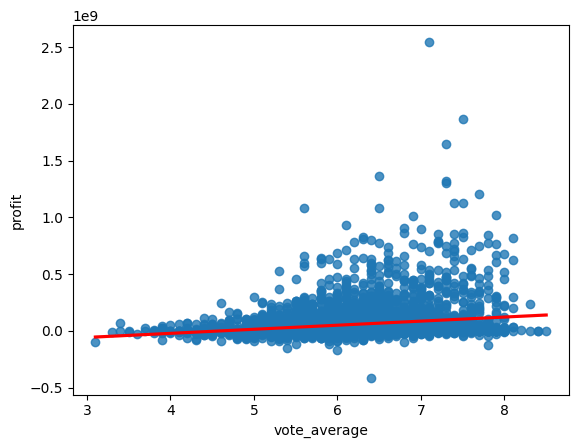

In [44]:
#Plots a graph showing how vote_average and profit are related.
#Purpose: To see if there's a pattern (trend, relationship or trend between two variables) between movie ratings and profit.
import seaborn as sns
sns.regplot( x='vote_average', y = 'profit', data = movies_counted, line_kws = {'color': 'red'})

<Axes: xlabel='vote_average', ylabel='revenue'>

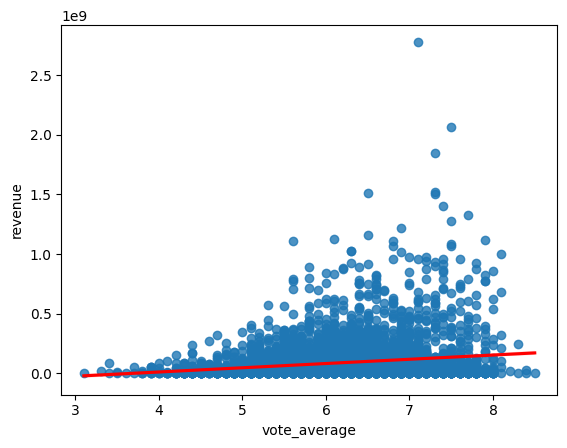

In [45]:
import seaborn as sns
sns.regplot( x='vote_average', y = 'revenue', data = movies_counted, line_kws = {'color': 'red'})

The best movies according to popularity return high profit and revenue

In [46]:
#Purpose: To identify if higher average ratings are associated with higher profit
# Select only numeric columns from the DataFrame
numeric_cols = movies_counted.select_dtypes(include='number')

# Calculate the Spearman correlation for the numeric columns
correlation_matrix = numeric_cols.corr(method='spearman')

# Display the correlation matrix
print(correlation_matrix)

              popularity  budget  runtime  vote_count  vote_average  profit  \
popularity          1.00    0.49     0.23        0.77          0.19    0.50   
budget              0.49    1.00     0.36        0.55         -0.04    0.33   
runtime             0.23    0.36     1.00        0.26          0.29    0.21   
vote_count          0.77    0.55     0.26        1.00          0.28    0.58   
vote_average        0.19   -0.04     0.29        0.28          1.00    0.20   
profit              0.50    0.33     0.21        0.58          0.20    1.00   
revenue             0.59    0.71     0.34        0.68          0.11    0.84   

              revenue  
popularity       0.59  
budget           0.71  
runtime          0.34  
vote_count       0.68  
vote_average     0.11  
profit           0.84  
revenue          1.00  


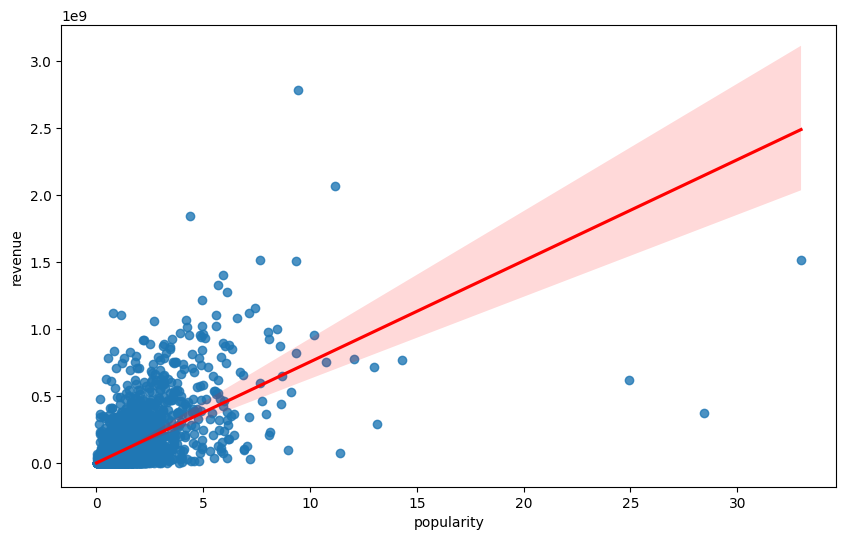

In [47]:
import seaborn as sns
import matplotlib.pyplot as plt  # Corrected the import statement

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Create the regression plot
sns.regplot(x='popularity', y='revenue', data=movies_counted, line_kws={'color': 'red'})

# Show the plot
plt.show()

Highly budget movies return high profit

In [48]:
movies_counted.head()

,popularity,budget,original_title,runtime,genres,release_date,vote_count,vote_average,profit,revenue
0,32.99,150000000,Jurassic World,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.50,1363528810,1513528810
1,28.42,150000000,Mad Max: Fury Road,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.10,228436354,378436354
2,13.11,110000000,Insurgent,119,Adventure|Science Fiction|Thriller,3/18/15,2480,6.30,185238201,295238201
3,11.17,200000000,Star Wars: The Force Awakens,136,Action|Adventure|Science Fiction|Fantasy,12/15/15,5292,7.50,1868178225,2068178225
4,9.34,190000000,Furious 7,137,Action|Crime|Thriller,4/1/15,2947,7.30,1316249360,1506249360


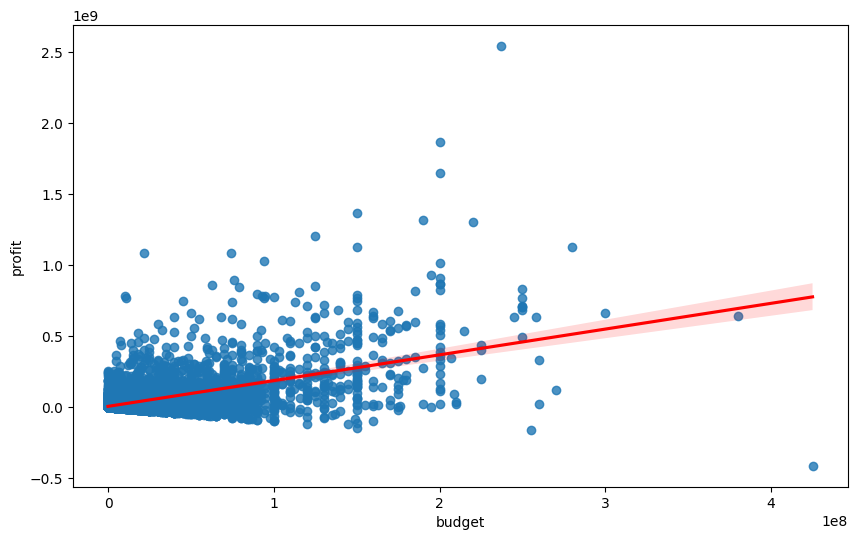

In [49]:
#Purpose: To visualize the relationship between movie budgets and profits, and see if higher budgets lead to higher profits
import seaborn as sns
import matplotlib.pyplot as plt  # Corrected the import statement

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Create the regression plot
sns.regplot(x='budget', y='profit', data=movies_counted, line_kws={'color': 'red'})

# Show the plot
plt.show()

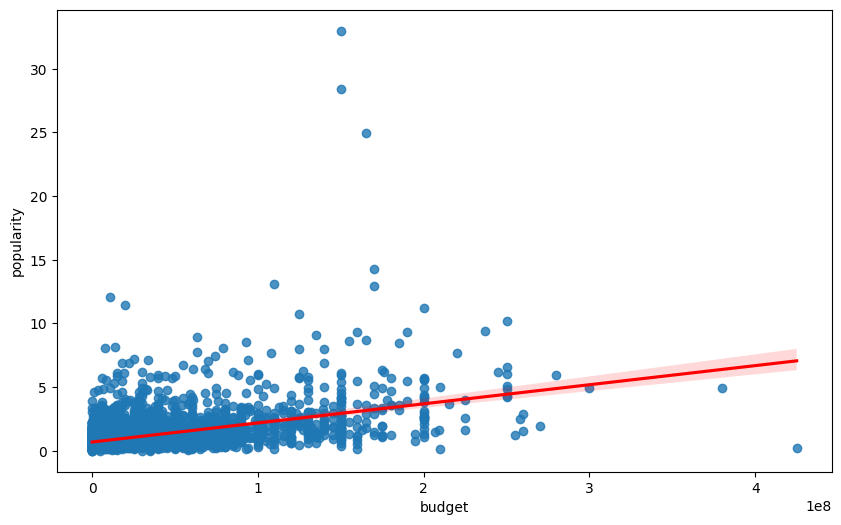

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt  # Corrected the import statement

# Set the figure size before plotting
plt.figure(figsize=(10, 6))

# Create the regression plot
sns.regplot(x='budget', y='popularity', data=movies_counted, line_kws={'color': 'red'})

# Show the plot
plt.show()


Addition :Purpose: To analyze profit by genre and year, addressing issues with the genre column visibility through various fixes

In [51]:
#Purpouse: Creates a new DataFrame movies_genre1 with selected columns from the movies DataFrame to for further analysis
movies_genre1 = movies[['popularity', 'budget', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count','vote_average', 'profit', 'revenue' ]]
movies.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,keywords,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj,profit
0,135397,tt0369610,32.99,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,monster|dna|tyrannosaurus rex|velociraptor|island,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.50,2015,137999939.28,1392445892.52,1363528810
1,76341,tt1392190,28.42,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,future|chase|post-apocalyptic|dystopia|australia,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.10,2015,137999939.28,348161292.49,228436354
2,262500,tt2908446,13.11,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,based on novel|revolution|dystopia|sequel|dyst...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.30,2015,101199955.47,271619025.41,185238201
3,140607,tt2488496,11.17,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,android|spaceship|jedi|space opera|3d,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.50,2015,183999919.04,1902723129.80,1868178225
4,168259,tt2820852,9.34,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,car race|speed|revenge|suspense|car,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.30,2015,174799923.09,1385748801.47,1316249360


In [52]:
#Purpose: To split the genres column into separate rows for each genre, update the DataFrame by removing the old genres column
#and adding the new genre_split column, and then display the updated DataFrame

import pandas as pd  # Ensure pandas is imported

# Check if the 'genres' column exists before proceeding
if 'genres' in movies_genre1.columns:
    # Split the genres column into individual genres
    split = movies_genre1['genres'].str.split('|').apply(pd.Series, 1).stack()

    # Fix the index to prepare for merging back
    split.index = split.index.droplevel(-1)
    split.name = 'genre_split'

    # Remove the original 'genres' column from movies_genre1
    del movies_genre1['genres']

    # Join the split genres back to the original DataFrame
    movies_genre1 = movies_genre1.join(split)

    # Display the updated DataFrame
    print(movies_genre1.head())
else:
    print("The 'genres' column does not exist in the DataFrame.")


<ipython-input-52-f28985307b63>:9: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre1['genres'].str.split('|').apply(pd.Series, 1).stack()


   popularity     budget      original_title  runtime  release_year  \
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
1       28.42  150000000  Mad Max: Fury Road      120          2015   

   vote_count  vote_average      profit     revenue      genre_split  
0        5562          6.50  1363528810  1513528810           Action  
0        5562          6.50  1363528810  1513528810        Adventure  
0        5562          6.50  1363528810  1513528810  Science Fiction  
0        5562          6.50  1363528810  1513528810         Thriller  
1        6185          7.10   228436354   378436354           Action  


In [53]:
#Purpose: To check and display the column names in movies_genre1 to confirm if the genres column exists or not
print(movies_genre1.columns.tolist())

['popularity', 'budget', 'original_title', 'runtime', 'release_year', 'vote_count', 'vote_average', 'profit', 'revenue', 'genre_split']


In [54]:
#Purpose: To create a DataFrame with specific columns and then check its content and column names to ensure that the genres column is present
movies_genre1 = movies[['popularity', 'budget', 'original_title', 'runtime', 'genres', 'release_year', 'vote_count', 'vote_average', 'profit', 'revenue']]

# Check the first few rows of movies_genre1
print(movies_genre1.head())

# Verify the columns in movies_genre1
print(movies_genre1.columns)

   popularity     budget                original_title  runtime  \
0       32.99  150000000                Jurassic World      124   
1       28.42  150000000            Mad Max: Fury Road      120   
2       13.11  110000000                     Insurgent      119   
3       11.17  200000000  Star Wars: The Force Awakens      136   
4        9.34  190000000                     Furious 7      137   

                                      genres  release_year  vote_count  \
0  Action|Adventure|Science Fiction|Thriller          2015        5562   
1  Action|Adventure|Science Fiction|Thriller          2015        6185   
2         Adventure|Science Fiction|Thriller          2015        2480   
3   Action|Adventure|Science Fiction|Fantasy          2015        5292   
4                      Action|Crime|Thriller          2015        2947   

   vote_average      profit     revenue  
0          6.50  1363528810  1513528810  
1          7.10   228436354   378436354  
2          6.30   18523820

In [55]:
#Purpose: Check if 'genres' exists in movies DataFrame
print(movies.columns)

Index(['id', 'imdb_id', 'popularity', 'budget', 'revenue', 'original_title',
       'cast', 'homepage', 'director', 'tagline', 'keywords', 'overview',
       'runtime', 'genres', 'production_companies', 'release_date',
       'vote_count', 'vote_average', 'release_year', 'budget_adj',
       'revenue_adj', 'profit'],
      dtype='object')


In [56]:
#Purpose: To fix the issue of the genres column not existing by splitting the genre data into individual rows, updating the DataFrame,
#and then removing the original genres column while adding a new genre_split column.
import pandas as pd

# Split the genres into individual rows
split = movies_genre1['genres'].str.split('|').apply(pd.Series, 1).stack()
split.index = split.index.droplevel(-1)  # Fix the index
split.name = 'genre_split'  # Name the new column

# Remove the original 'genres' column
del movies_genre1['genres']

# Join the split genres back into the DataFrame
movies_genre1 = movies_genre1.join(split)

# Display the updated DataFrame
print(movies_genre1.head())

<ipython-input-56-6f86cf805eb2>:6: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  split = movies_genre1['genres'].str.split('|').apply(pd.Series, 1).stack()


   popularity     budget      original_title  runtime  release_year  \
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
0       32.99  150000000      Jurassic World      124          2015   
1       28.42  150000000  Mad Max: Fury Road      120          2015   

   vote_count  vote_average      profit     revenue      genre_split  
0        5562          6.50  1363528810  1513528810           Action  
0        5562          6.50  1363528810  1513528810        Adventure  
0        5562          6.50  1363528810  1513528810  Science Fiction  
0        5562          6.50  1363528810  1513528810         Thriller  
1        6185          7.10   228436354   378436354           Action  


In [64]:
#Purpose: To calculate the average profit for each genre by year and display the results.
# Group by 'release_year' and 'genre_split', then calculate the mean profit
grouped_data = movies_genre1.groupby(['release_year', 'genre_split'])['profit'].mean().reset_index()

# Display the result
print(grouped_data.head())

   release_year genre_split     profit
0          1960      Action 6363125.00
1          1960   Adventure  431000.00
2          1960      Comedy 5258750.00
3          1960       Crime       0.00
4          1960       Drama 8245619.38


In [58]:
#Groups the movies_genre1 DataFrame by release_year and genre_split, then calculates the average profit for each group,
#and resets the index to create a clean DataFrame
#Purpose: To see how profitable each genre is by year.

import pandas as pd
grouped_data = movies_genre1.groupby(['release_year', 'genre_split'])['profit'].mean().reset_index()

In [59]:
# Purpose: Pivot the DataFrame to have 'genre_split' as index, 'release_year' as columns, and mean 'profit' as values
pivot_table = grouped_data.pivot(index='genre_split', columns='release_year', values='profit')

# Display the pivot table
print(pivot_table)

release_year          1960         1961        1962        1963        1964  \
genre_split                                                                   
Action          6363125.00   2457142.86 10437500.00 14999691.25 24280000.00   
Adventure        431000.00  39130002.33 21214285.71  9428395.00 24123400.00   
Animation              NaN 211880014.00         NaN        0.00        0.00   
Comedy          5258750.00  22198001.40  1599974.80   765591.92  7080111.38   
Crime                 0.00  18828411.00  3709948.67   369526.75  1723307.30   
Documentary            NaN          NaN         NaN         NaN         NaN   
Drama           8245619.38   4912698.38  4373796.19  1587307.69  3726105.55   
Family          3333333.33  42576002.80  4000000.00  -333333.33 37818181.75   
Fantasy         -375000.00         0.00     -126.00  -500000.00 24068181.75   
Foreign               0.00         0.00     -126.00        0.00        0.00   
History         9600000.00   2333333.33 11250000.00 

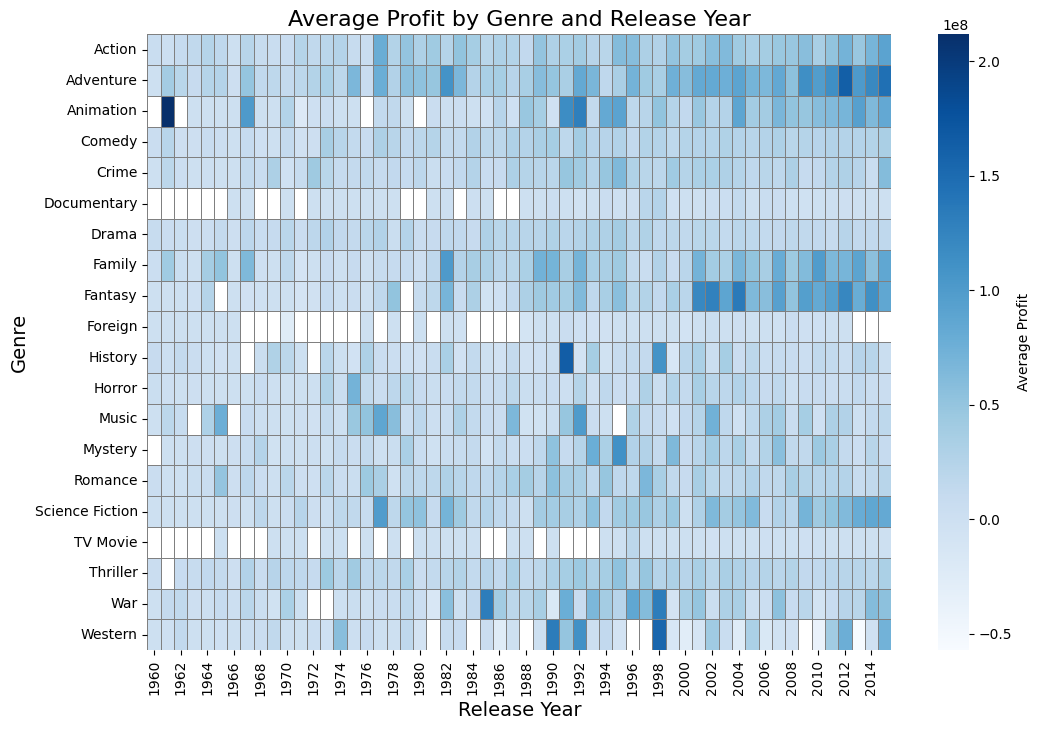

In [60]:
#Purpose: To show how average profit changes by genre and year with a heatmap.

#To manage and analyze data with DataFrames
import pandas as pd

#To create advanced statistical plots and visualizations
import seaborn as sns

#To create and display basic plots and customize figures
import matplotlib.pyplot as plt

# Group by 'release_year' and 'genre_split', then calculate the mean of 'profit'
grouped_data = movies_genre1.groupby(['release_year', 'genre_split'])['profit'].mean().reset_index()

# Pivot the DataFrame to have 'genre_split' as rows and 'release_year' as columns
pivot_table = grouped_data.pivot(index='genre_split', columns='release_year', values='profit')

# Create and display the heatmap
plt.figure(figsize=(12, 8))  # Set the size of the figure
sns.heatmap(pivot_table, cmap='Blues', annot=False, linewidths=0.5, linecolor='gray', cbar_kws={'label': 'Average Profit'})

# Add title and labels
plt.title('Average Profit by Genre and Release Year', fontsize=16)
plt.xlabel('Release Year', fontsize=14)
plt.ylabel('Genre', fontsize=14)

plt.show()